In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/My Drive/perros/Todo'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'perro' in filename:
      y.append(0) #indice 0 perro [perro,persona,casa]
    elif 'persona' in filename: #indice 1 persona
      y.append(1)
    elif 'casa' in filename: #indice 2 casa
      y.append(2)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas

In [39]:
type(image_list)

list

In [40]:
type(image_list[0])

numpy.ndarray

In [41]:
image_list[0]

array([[[0.92156863, 0.92156863, 0.95294118],
        [0.92156863, 0.91764706, 0.94901961],
        [0.91764706, 0.91372549, 0.94509804],
        ...,
        [0.95294118, 0.94117647, 0.97647059],
        [0.94901961, 0.9372549 , 0.97254902],
        [0.94901961, 0.9372549 , 0.97254902]],

       [[0.91764706, 0.91764706, 0.94901961],
        [0.92156863, 0.91764706, 0.94901961],
        [0.92156863, 0.91764706, 0.94901961],
        ...,
        [0.95294118, 0.94117647, 0.97647059],
        [0.95294118, 0.94117647, 0.97647059],
        [0.94901961, 0.9372549 , 0.97647059]],

       [[0.91764706, 0.91764706, 0.94901961],
        [0.92156863, 0.91764706, 0.94901961],
        [0.92156863, 0.91764706, 0.94901961],
        ...,
        [0.94901961, 0.9372549 , 0.96862745],
        [0.95294118, 0.94117647, 0.97254902],
        [0.95294118, 0.94117647, 0.97254902]],

       ...,

       [[0.96078431, 0.91764706, 0.94901961],
        [0.95294118, 0.90980392, 0.94509804],
        [0.9372549 , 0

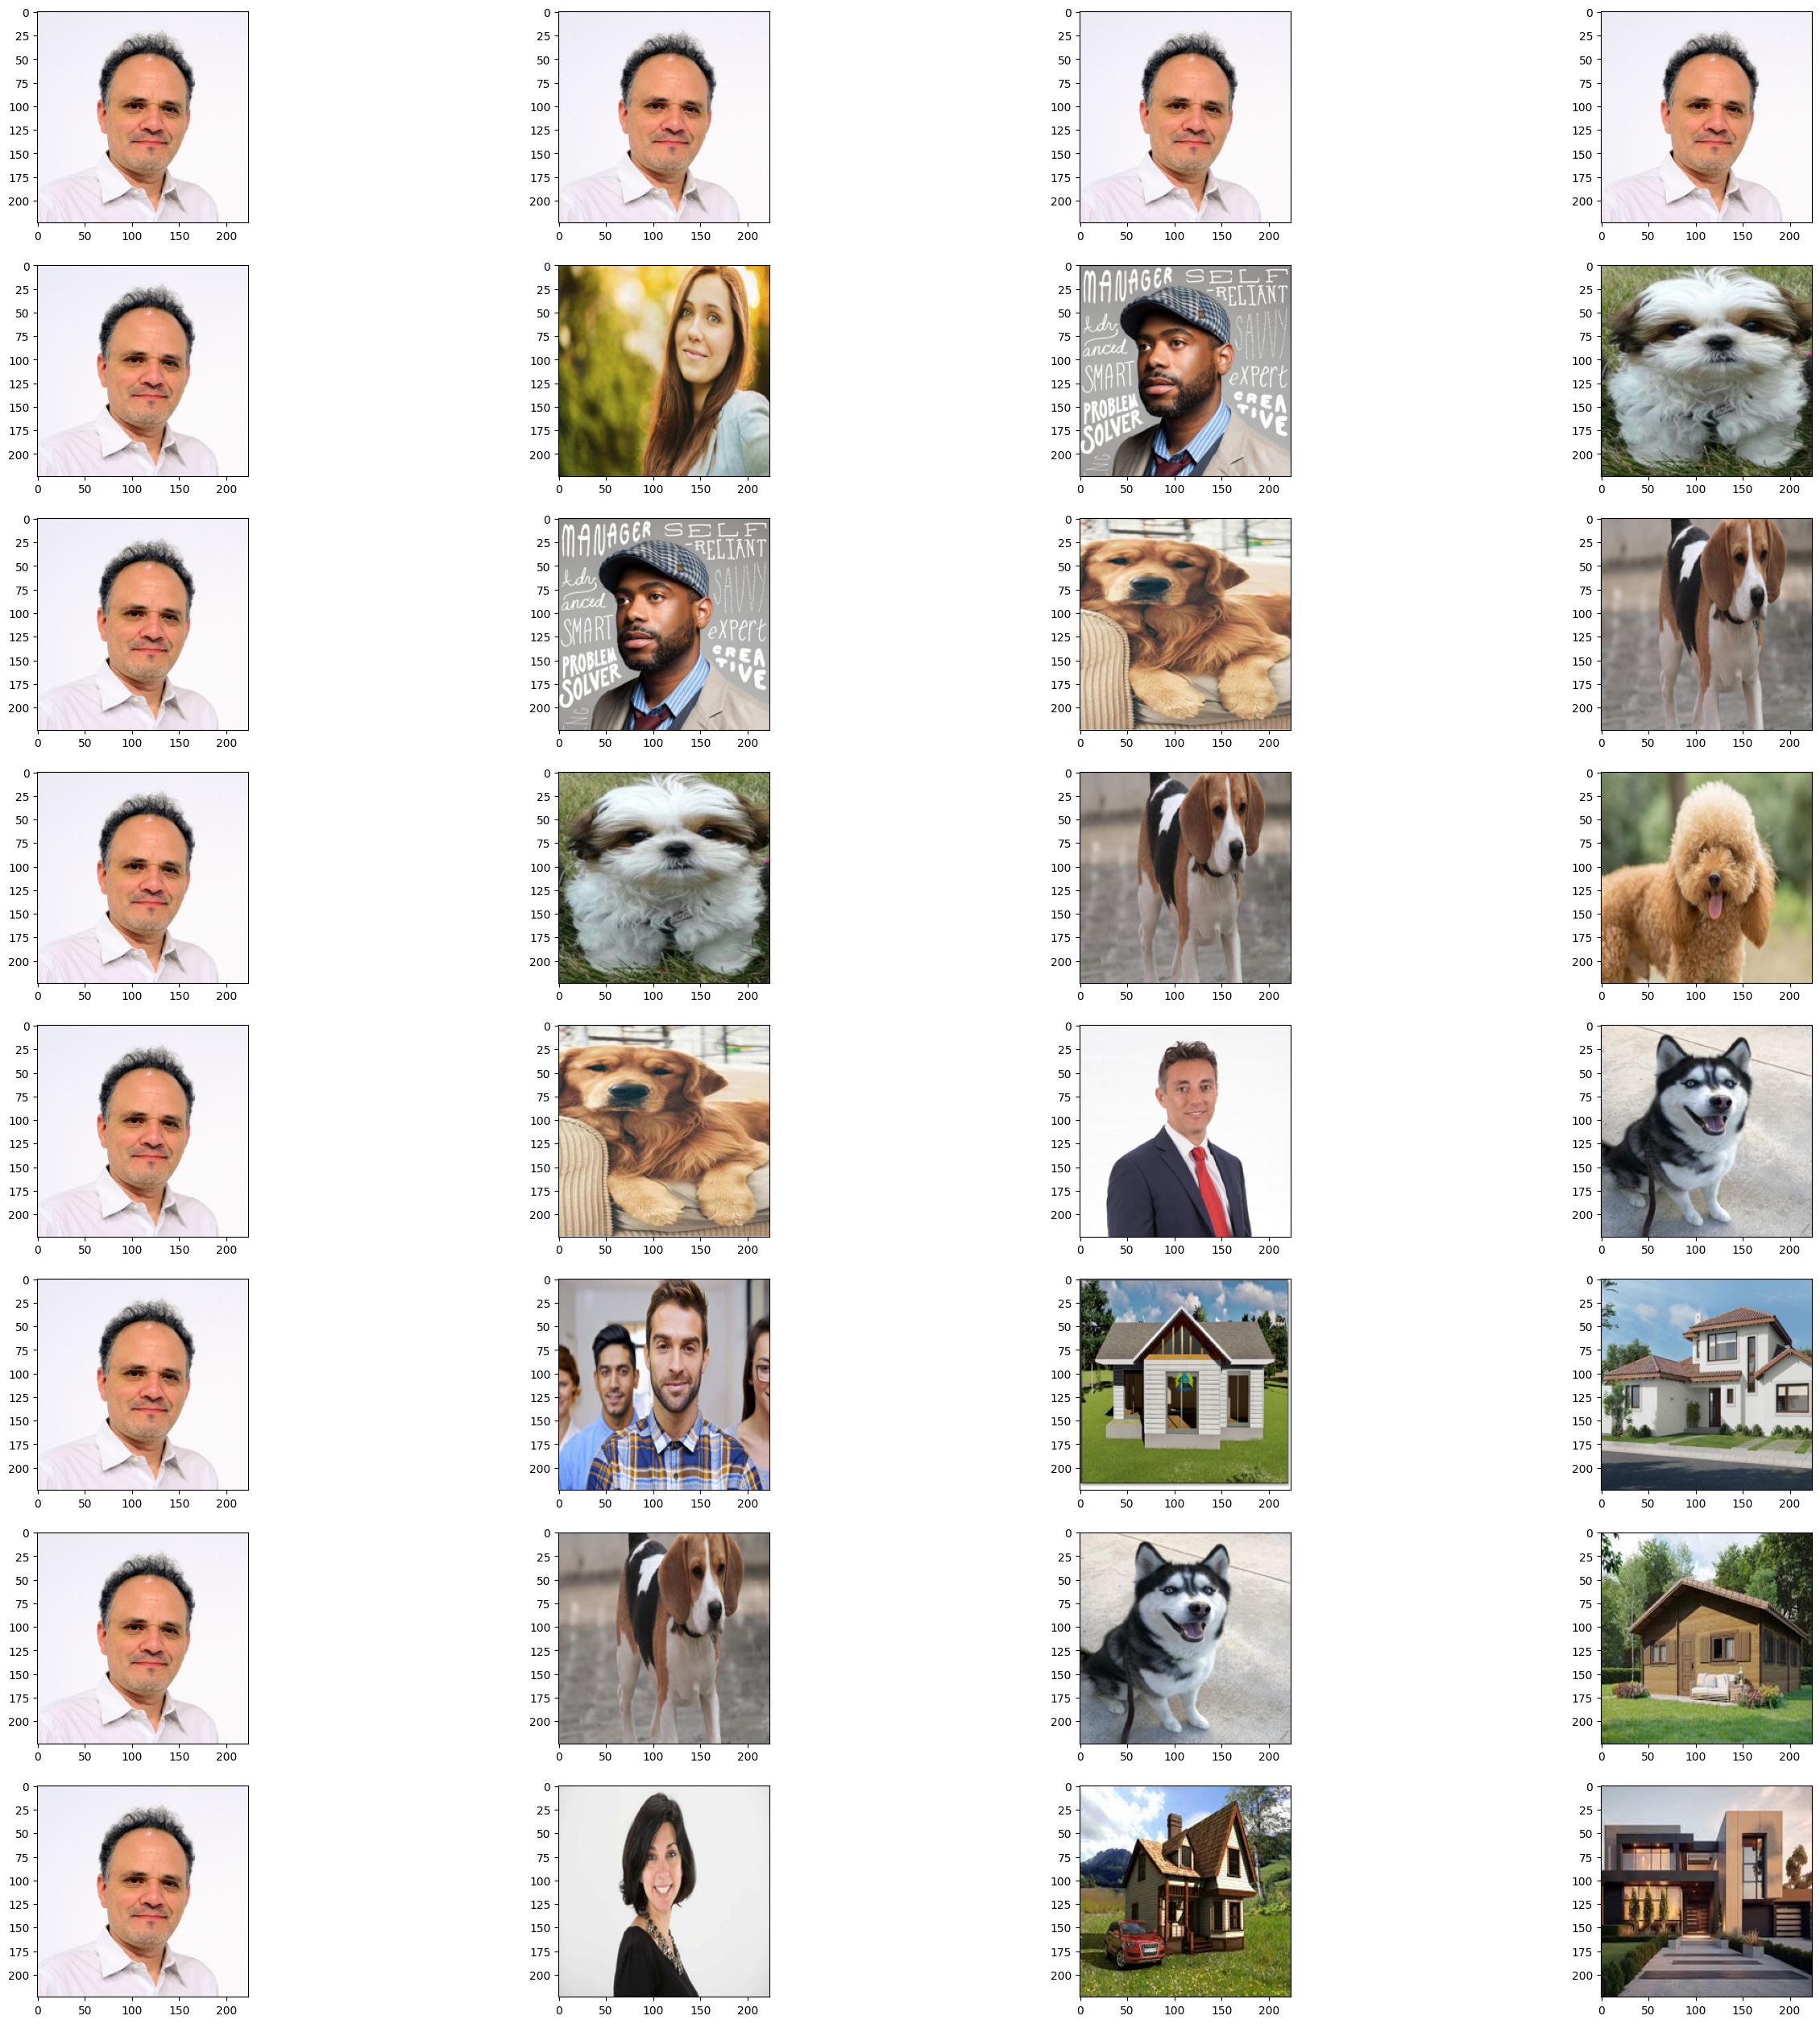

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
import matplotlib.pyplot as plt
nImagenes = len(image_list)
filas = nImagenes // 4
fig, axes = plt.subplots(filas,4, figsize=(32,32))
for f in range(filas):
  for c in range(4):
    axes[f,c].imshow(image_list[f*c])

#axes[0,0].imshow(image_list_train[0])
#for i,ax in enumerate(image_list_train):
#    ax.imshow(image_list_train[i].flat)
#imgplot = plt.imshow(img)
#plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
y_test

[0, 0, 0, 2, 1, 1, 2]

In [45]:
y_train

[0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1]

In [46]:
#Carga de librerias
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten
keras.utils.set_random_seed(812)
np.random.seed(812)
model = models.Sequential()
tam_kernel1 = (3,3)
model.add(layers.Conv2D(64, tam_kernel1, activation='relu', input_shape=(224, 224, 3)))
tam_pooling1 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling1))
tam_kernel2 = (3,3)
model.add(layers.Conv2D(64, tam_kernel2, activation='relu'))
tam_pooling2 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling2))
tam_kernel3 = (3,3)
#model.add(layers.Conv2D(64, tam_kernel3, activation='relu'))
#tam_pooling3 = (2,2)
#model.add(layers.MaxPooling2D(tam_pooling3))
#tam_kernel4 = (3,3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [48]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1]

In [50]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [51]:
#Verificamos el cambio
y_train

array([0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2,
       2, 1, 1, 1])

In [52]:
type(y_train)

numpy.ndarray

In [53]:
y_train.shape

(26,)

In [54]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)

In [55]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
ajuste = %time model.fit(X_train,y_train,epochs=30,batch_size=16)
ajuste

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.2163 - loss: 4.9788
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4840 - loss: 12.7310
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3141 - loss: 2.7872
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6442 - loss: 0.8292 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8141 - loss: 0.6084
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9535 - loss: 0.2952
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0754
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0317
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0284 
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8606 - loss: 0.5769
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7212 - loss: 1.7912
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9744 - loss: 0.0364 

In [56]:
%time y_train

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [57]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [58]:
y_test = keras.utils.to_categorical(y_test, num_classes=3)

In [59]:
#Verificamos su forma
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [60]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step


In [61]:
#Revisamos el resultado
y_pred

array([[7.92417228e-01, 1.60220623e-01, 4.73620668e-02],
       [2.12562412e-01, 7.62455702e-01, 2.49818936e-02],
       [9.85485196e-01, 3.25776776e-03, 1.12569556e-02],
       [2.11223722e-01, 2.87193861e-02, 7.60056913e-01],
       [1.63286962e-02, 9.82611716e-01, 1.05958839e-03],
       [2.55474099e-03, 9.97444391e-01, 8.01705141e-07],
       [1.18200136e-04, 4.74597901e-01, 5.25283873e-01]], dtype=float32)

In [62]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [63]:
type(y_pred)

numpy.ndarray

In [64]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [65]:
type(y_test)

numpy.ndarray

In [66]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 2, 1, 1, 2])

In [67]:
y_test = np.argmax(y_test, axis=1)
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [68]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.8571428571428571
Precisión por clase: [1.         0.66666667 1.        ] -> 0.8888888888888888
Sensibilidad por clase: [0.66666667 1.         1.        ] -> 0.8888888888888888
F1 Score por clase: [0.8 0.8 1. ] -> 0.8666666666666667


In [69]:
y_test

array([0, 0, 0, 2, 1, 1, 2])

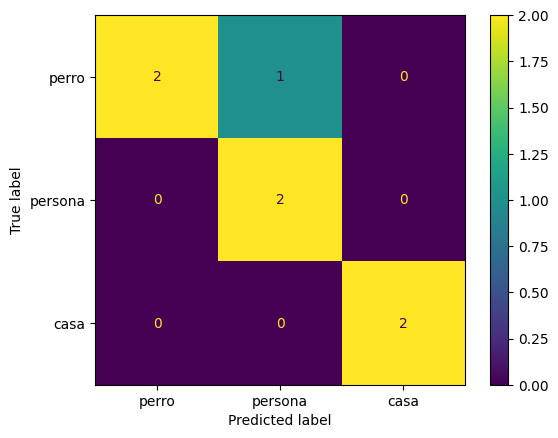

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['perro','persona','casa']
disp.plot()

In [71]:
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [72]:
y_pred

array([0, 1, 0, 2, 1, 1, 2])

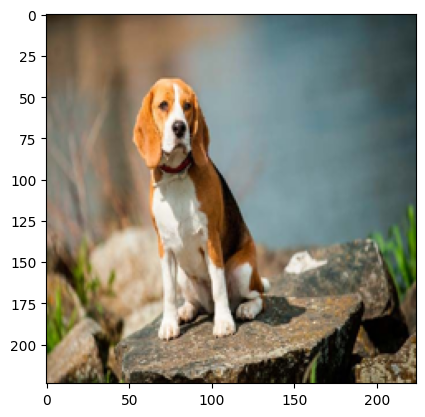

In [73]:
import matplotlib.pyplot as plt
img_array = (X_test[1] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)